## Read the data 

In [4]:
import pandas as pd 
import numpy as np 

train_data_path = '/home/pranjal/Downloads/TRAIN.csv'
train_data = pd.read_csv(train_data_path)

train_data.head()

,Item code,Category,State,29-01-2017,30-01-2017,31-01-2017,01-02-2017,02-02-2017,03-02-2017,04-02-2017,...,13-02-2022,14-02-2022,15-02-2022,16-02-2022,17-02-2022,18-02-2022,19-02-2022,20-02-2022,21-02-2022,22-02-2022
0,ANTIDIABETIC_001,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,4,0,0,0,0,1,1,2,0,4
1,ANTIDIABETIC_002,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ANTIDIABETIC_003,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,ANTIDIABETIC_004,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,2,1,0,0,0,2,0,5,4,2
4,ANTIDIABETIC_005,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,5,2,2,2,1,0,0,0,3,0


In [5]:
#convert the data set from wide to long format 

data_long = pd.melt(train_data, id_vars =['Item code','Category', 'State'],var_name ='Date', value_name='Sales')
data_long

,Item code,Category,State,Date,Sales
0,ANTIDIABETIC_001,ANTIDIABETIC,MH,29-01-2017,0
1,ANTIDIABETIC_002,ANTIDIABETIC,MH,29-01-2017,0
2,ANTIDIABETIC_003,ANTIDIABETIC,MH,29-01-2017,0
3,ANTIDIABETIC_004,ANTIDIABETIC,MH,29-01-2017,0
4,ANTIDIABETIC_005,ANTIDIABETIC,MH,29-01-2017,0
...,...,...,...,...,...
6463687,ANTIBIOTIC_215,ANTIBIOTIC,TN,22-02-2022,1
6463688,ANTIBIOTIC_216,ANTIBIOTIC,TN,22-02-2022,1
6463689,ANTIBIOTIC_217,ANTIBIOTIC,TN,22-02-2022,0
6463690,ANTIBIOTIC_218,ANTIBIOTIC,TN,22-02-2022,7


## Catboosting Algorithm 

In [8]:
import pandas as pd 
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Load data
data = pd.read_csv('/home/pranjal/Downloads/data_long.csv')  # Change 'your_data.csv' to the path of your dataset

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract features from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Get unique regions
regions = data['State'].unique()

# Separate data for each region
region_models = {}


for region in regions:
    # Filter data for the current region
    region_data = data[data['State'] == region]
    
    # Split the data into training and test sets
    X = region_data[['Year', 'Month', 'Day']]  # Features
    y = region_data['Sales']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train CatBoostRegressor model
    catboost_model = CatBoostRegressor()
    catboost_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = catboost_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error (MSE) for {region}: {mse}")
    
    # Save the model for the current region
    region_models[region] = catboost_model

# Predict sales for the next 90 days for each region using the last available data
next_90_days = pd.date_range(data['Date'].max() + timedelta(days=1), periods=90)
predicted_sales = pd.DataFrame(columns=['Date', 'Region', 'Predicted_Sales'])

for region, model in region_models.items():
    X_next = pd.DataFrame({'Year': next_90_days.year, 'Month': next_90_days.month, 'Day': next_90_days.day})
    next_predictions = model.predict(X_next)
    region_predictions = pd.DataFrame({'Date': next_90_days, 'Region': region, 'Predicted_Sales': next_predictions})
    predicted_sales = pd.concat([predicted_sales, region_predictions])

# Print the predicted sales for the next 90 days
print(predicted_sales)


Learning rate set to 0.132904
0:	learn: 2.7436028	total: 421ms	remaining: 7m
1:	learn: 2.7420829	total: 710ms	remaining: 5m 54s
2:	learn: 2.7409314	total: 1.02s	remaining: 5m 37s
3:	learn: 2.7400405	total: 1.32s	remaining: 5m 28s
4:	learn: 2.7393579	total: 1.63s	remaining: 5m 24s
5:	learn: 2.7388193	total: 1.93s	remaining: 5m 20s
6:	learn: 2.7384038	total: 2.27s	remaining: 5m 22s
7:	learn: 2.7380992	total: 2.6s	remaining: 5m 21s
8:	learn: 2.7378235	total: 2.93s	remaining: 5m 22s
9:	learn: 2.7376403	total: 3.27s	remaining: 5m 24s
10:	learn: 2.7374926	total: 3.64s	remaining: 5m 27s
11:	learn: 2.7373784	total: 3.98s	remaining: 5m 27s
12:	learn: 2.7372778	total: 4.32s	remaining: 5m 28s
13:	learn: 2.7371929	total: 4.67s	remaining: 5m 28s
14:	learn: 2.7371048	total: 5.32s	remaining: 5m 49s
15:	learn: 2.7370241	total: 5.74s	remaining: 5m 53s
16:	learn: 2.7368537	total: 6.13s	remaining: 5m 54s
17:	learn: 2.7367939	total: 6.87s	remaining: 6m 14s
18:	learn: 2.7367349	total: 7.29s	remaining: 6m 1

/tmp/ipykernel_11820/3577012118.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predicted_sales = pd.concat([predicted_sales, region_predictions])


# Calculate Wmape 

In [9]:
def wmape(actual, forecast):
    """
    Calculates the Weighted Mean Absolute Percentage Error (WMAPE).
    
    Parameters:
    actual (array-like): Array of actual sales values.
    forecast (array-like): Array of forecasted sales values.
    
    Returns:
    float: WMAPE value.
    """
    weights = actual.replace(0, 1)  # Replace zeros with ones to avoid division by zero
    absolute_percentage_errors = abs((actual - forecast) / weights)
    wmape = sum(absolute_percentage_errors) / sum(weights)
    return wmape * 100  # Convert to percentage

# Assuming you have actual sales values and forecasted sales values
actual_sales = y_test  # Actual sales values
forecasted_sales = predictions  # Forecasted sales values

# Calculate WMAPE
wmape_value = wmape(actual_sales, forecasted_sales)
print(f"Weighted Mean Absolute Percentage Error (WMAPE): {wmape_value:.2f}%")


Weighted Mean Absolute Percentage Error (WMAPE): 46.46%


In [10]:
predicted_sales

,Date,Region,Predicted_Sales
0,2022-02-23,MH,1.412780
1,2022-02-24,MH,1.075690
2,2022-02-25,MH,0.870280
3,2022-02-26,MH,0.928433
4,2022-02-27,MH,1.253137
...,...,...,...
85,2022-05-19,TN,1.164760
86,2022-05-20,TN,1.340383
87,2022-05-21,TN,1.087755
88,2022-05-22,TN,0.972047


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'predicted_sales' is your DataFrame with columns 'Date', 'Region', and 'Predicted_Sales'
predicted_sales_scaled = predicted_sales[['Predicted_Sales']]  # Extract the predicted sales column for scaling

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the original data that was used for scaling
# Assuming your original sales data was between 0 and 1
scaler.fit([[0], [1]])

# Invert the scaling transformation
predicted_sales_inverted = scaler.inverse_transform(predicted_sales_scaled)

# Update the 'Predicted_Sales' column with the inverted values
predicted_sales['Predicted_Sales'] = predicted_sales_inverted

# Print the DataFrame with inverted predicted sales
print(predicted_sales)


         Date Region  Predicted_Sales
0  2022-02-23     MH         1.412780
1  2022-02-24     MH         1.075690
2  2022-02-25     MH         0.870280
3  2022-02-26     MH         0.928433
4  2022-02-27     MH         1.253137
..        ...    ...              ...
85 2022-05-19     TN         1.164760
86 2022-05-20     TN         1.340383
87 2022-05-21     TN         1.087755
88 2022-05-22     TN         0.972047
89 2022-05-23     TN         1.215207

[270 rows x 3 columns]


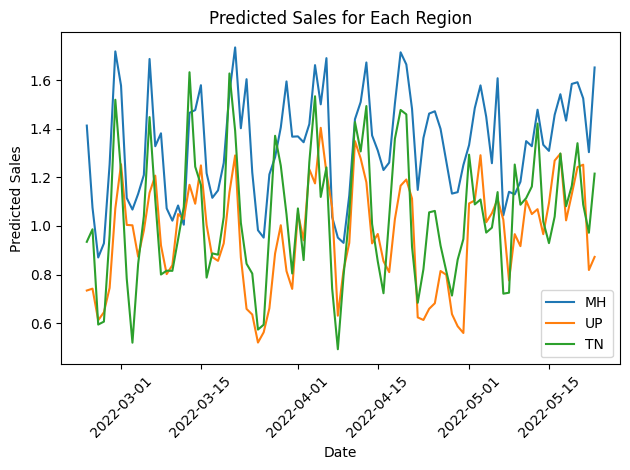

In [12]:
import matplotlib.pyplot as plt

# Plot predicted sales for each region
for region in predicted_sales['Region'].unique():
    region_data = predicted_sales[predicted_sales['Region'] == region]
    plt.plot(region_data['Date'], region_data['Predicted_Sales'], label=region)

plt.title('Predicted Sales for Each Region')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# For next 90 days 

In [13]:
# Define the start and end dates for the next 90 days
start_date = datetime(2022, 2, 23)
end_date = datetime(2022, 5, 23)

# Predict sales for the next 90 days for each region
next_90_days = pd.date_range(start_date, end_date)
predicted_sales_next_90_days = pd.DataFrame(columns=['Date', 'Region', 'Predicted_Sales'])

for region, model in region_models.items():
    X_next = pd.DataFrame({'Year': next_90_days.year, 'Month': next_90_days.month, 'Day': next_90_days.day})
    next_predictions = model.predict(X_next)
    region_predictions = pd.DataFrame({'Date': next_90_days, 'Region': region, 'Predicted_Sales': next_predictions})
    predicted_sales_next_90_days = pd.concat([predicted_sales_next_90_days, region_predictions])

# Print the predicted sales for the next 90 days
print(predicted_sales_next_90_days)


         Date Region  Predicted_Sales
0  2022-02-23     MH         1.412780
1  2022-02-24     MH         1.075690
2  2022-02-25     MH         0.870280
3  2022-02-26     MH         0.928433
4  2022-02-27     MH         1.253137
..        ...    ...              ...
85 2022-05-19     TN         1.164760
86 2022-05-20     TN         1.340383
87 2022-05-21     TN         1.087755
88 2022-05-22     TN         0.972047
89 2022-05-23     TN         1.215207

[270 rows x 3 columns]


/tmp/ipykernel_11820/2053863627.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predicted_sales_next_90_days = pd.concat([predicted_sales_next_90_days, region_predictions])


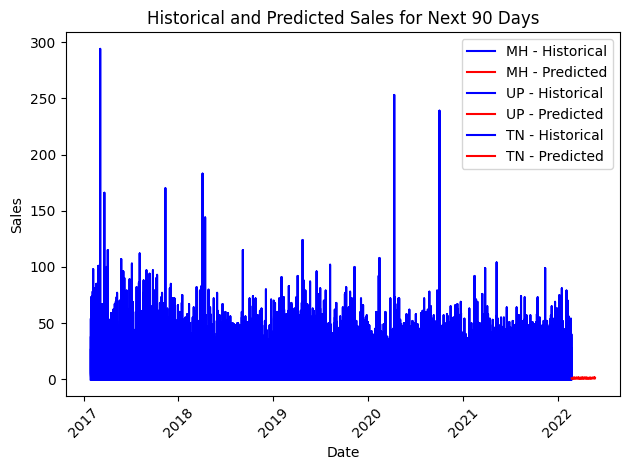

In [14]:
# Invert the scaling transformation for the predicted sales for the next 90 days
predicted_sales_scaled_next_90_days = predicted_sales_next_90_days[['Predicted_Sales']]  
# Extract the predicted sales column for scaling
predicted_sales_inverted_next_90_days = scaler.inverse_transform(predicted_sales_scaled_next_90_days)

# Update the 'Predicted_Sales' column with the inverted values
predicted_sales_next_90_days['Predicted_Sales'] = predicted_sales_inverted_next_90_days

# Plot historical and predicted sales for each region
for region in predicted_sales_next_90_days['Region'].unique():
    region_data = predicted_sales_next_90_days[predicted_sales_next_90_days['Region'] == region]
    
    # Plot historical sales
    plt.plot(data[data['State'] == region]['Date'], data[data['State'] == region]['Sales'], label=f'{region} - Historical', color='blue')
    
    # Plot predicted sales for the next 90 days
    plt.plot(region_data['Date'], region_data['Predicted_Sales'], label=f'{region} - Predicted', color='red')

plt.title('Historical and Predicted Sales for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
# Pivot the predicted sales data from long to wide format
predicted_sales_wide = predicted_sales_next_90_days.pivot(index='Date', columns='Region', values='Predicted_Sales')

# Reset index to make 'Date' a column again
predicted_sales_wide.reset_index(inplace=True)

# Print the wide format predicted sales data
print(predicted_sales_wide)

Region       Date        MH        TN        UP
0      2022-02-23  1.412780  0.934662  0.734398
1      2022-02-24  1.075690  0.986294  0.742107
2      2022-02-25  0.870280  0.594417  0.612133
3      2022-02-26  0.928433  0.606504  0.645066
4      2022-02-27  1.253137  0.963187  0.745001
..            ...       ...       ...       ...
85     2022-05-19  1.584158  1.164760  1.130115
86     2022-05-20  1.591035  1.340383  1.241953
87     2022-05-21  1.524685  1.087755  1.251883
88     2022-05-22  1.303427  0.972047  0.818724
89     2022-05-23  1.651770  1.215207  0.872621

[90 rows x 4 columns]


In [19]:
predicted_sales_wide.to_csv("/home/pranjal/Downloads/pred_sales_90")

In [20]:
predicted_sales_wide.to_excel("/home/pranjal/Downloads/pred_sales_90.xlsx")
